<a href="https://colab.research.google.com/github/leaf7823/Youtube_Study/blob/master/%E7%AC%AC8%E5%9B%9E%E3%80%90%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%80%91%E3%82%B5%E3%83%9D%E3%83%BC%E3%83%88%E3%83%99%E3%82%AF%E3%83%88%E3%83%AB%E3%83%9E%E3%82%B7%E3%83%B3%EF%BC%88%E5%BE%8C%E7%B7%A8%EF%BC%89%E9%96%A2%E6%95%B0%E7%89%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install mglearn 

In [0]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn .datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
moons = make_moons(n_samples=200,noise=0.1,random_state=0)
moons

X=moons[0]
y=moons[1]

In [0]:
#ds分割
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y,random_state=0)

#スケーリング
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.fit_transform(X_test)

In [0]:
from sklearn.pipeline import Pipeline

poly_svm = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ('SVM', LinearSVC())
])

poly_svm.fit(X,y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVM',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [0]:
def plot_decision_function(model):
    _x0 = np.linspace(-1.5, 2.5, 100)
    _x1 = np.linspace(-1.0, 1.5, 100)
    x0, x1 = np.meshgrid(_x0, _x1)
    x = np.c_[x0.ravel(), x1.ravel()]
    print(x)
    y_pred = model.predict(X).reshape(x0.shape)
    y_decision = model.decision_function(X),reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision,levels=[y_decision.min(), 0, y_decision.max()], alpha=0.3)

def plot_dataset(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo",  ms=15)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r^",  ms=15)
    plt.xlabel("$x_1$", fontsize=20)
    plt.ylabel("$x_2$", fontsize=20, rotation=0)

plt.figure(figsize=(12, 8))
plot_decision_function(poly_svm)
plot_dataset(X, y)
plt.show()


[[-1.5        -1.        ]
 [-1.45959596 -1.        ]
 [-1.41919192 -1.        ]
 ...
 [ 2.41919192  1.5       ]
 [ 2.45959596  1.5       ]
 [ 2.5         1.5       ]]


ValueError: ignored

<Figure size 864x576 with 0 Axes>

Text(0, 0.5, '$X_1$')

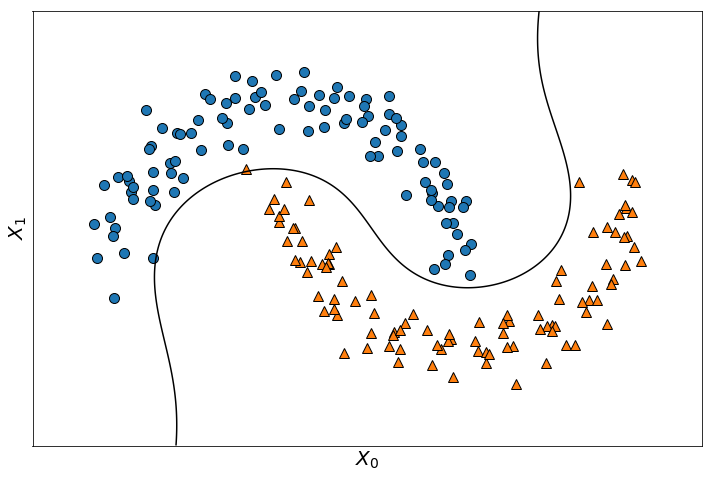

In [0]:
plt.figure(figsize=(12, 8))
mglearn.plots.plot_2d_separator(poly_svm, X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("$X_0$",fontsize=20)
plt.ylabel("$X_1$",fontsize=20)